# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [2]:
! git clone https://github.com/JinMizar/labs.git

Cloning into 'labs'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 128 (delta 52), reused 52 (delta 27), pack-reused 39 (from 1)
Receiving objects: 100% (128/128), 21.00 MiB | 18.83 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1. Clean the data and perform some EDA and visualization to get to know the data set.

In [18]:
# load the car dataset
df = pd.read_csv('/content/labs/04_hedonic_pricing/cars_hw.csv')
print(df.head(),'\n')
print(df.describe(),'\n')
print(df.shape)


   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000   

       Unnamed: 0    Make_Year

In [7]:
print(df.isnull().sum())


Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64


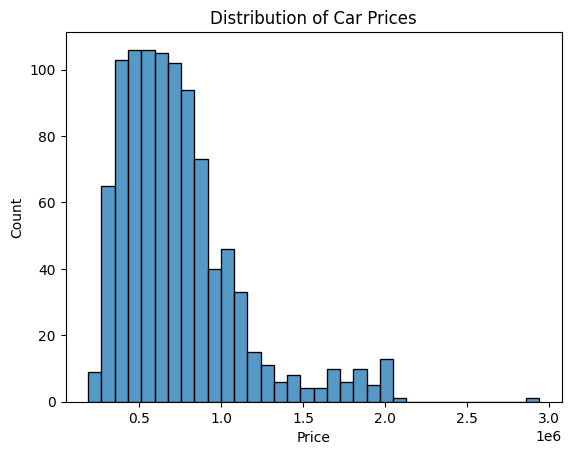

In [16]:
sns.histplot(df['Price'])
plt.title('Distribution of Car Prices')
plt.show()

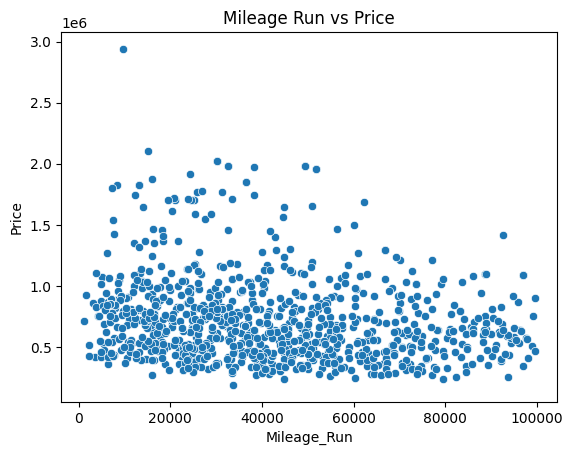

In [21]:
sns.scatterplot(x='Mileage_Run', y='Price', data=df)
plt.title('Mileage Run vs Price')
plt.show()

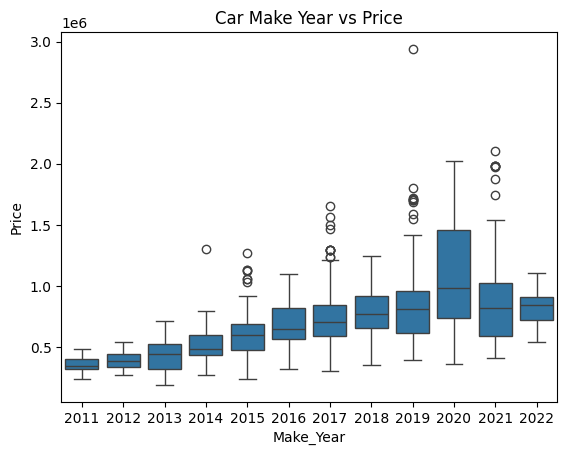

In [23]:
sns.boxplot(x='Make_Year', y='Price', data=df)
plt.title('Car Make Year vs Price')
plt.show()

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [9]:
pd.set_option('future.no_silent_downcasting', True)
df['No_of_Owners'] = df['No_of_Owners'].replace({'1st': 1, '2nd': 2, '3rd': 3})

In [10]:
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual,515000


In [20]:
from sklearn.model_selection import train_test_split
y = df['Price']
X = df.drop('Price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes